
Variable Descriptions:
lyr_top: Depth at the top of the soil layer (cm).
lyr_bot: Depth at the bottom of the soil layer (cm).
lyr_mass: Mass of the soil layer sample (g).
pro_depth_water: Depth to the water table (cm).
pro_bedrock_depth: Depth to bedrock (cm).
pro_elevation: Elevation of the soil sample location (m).


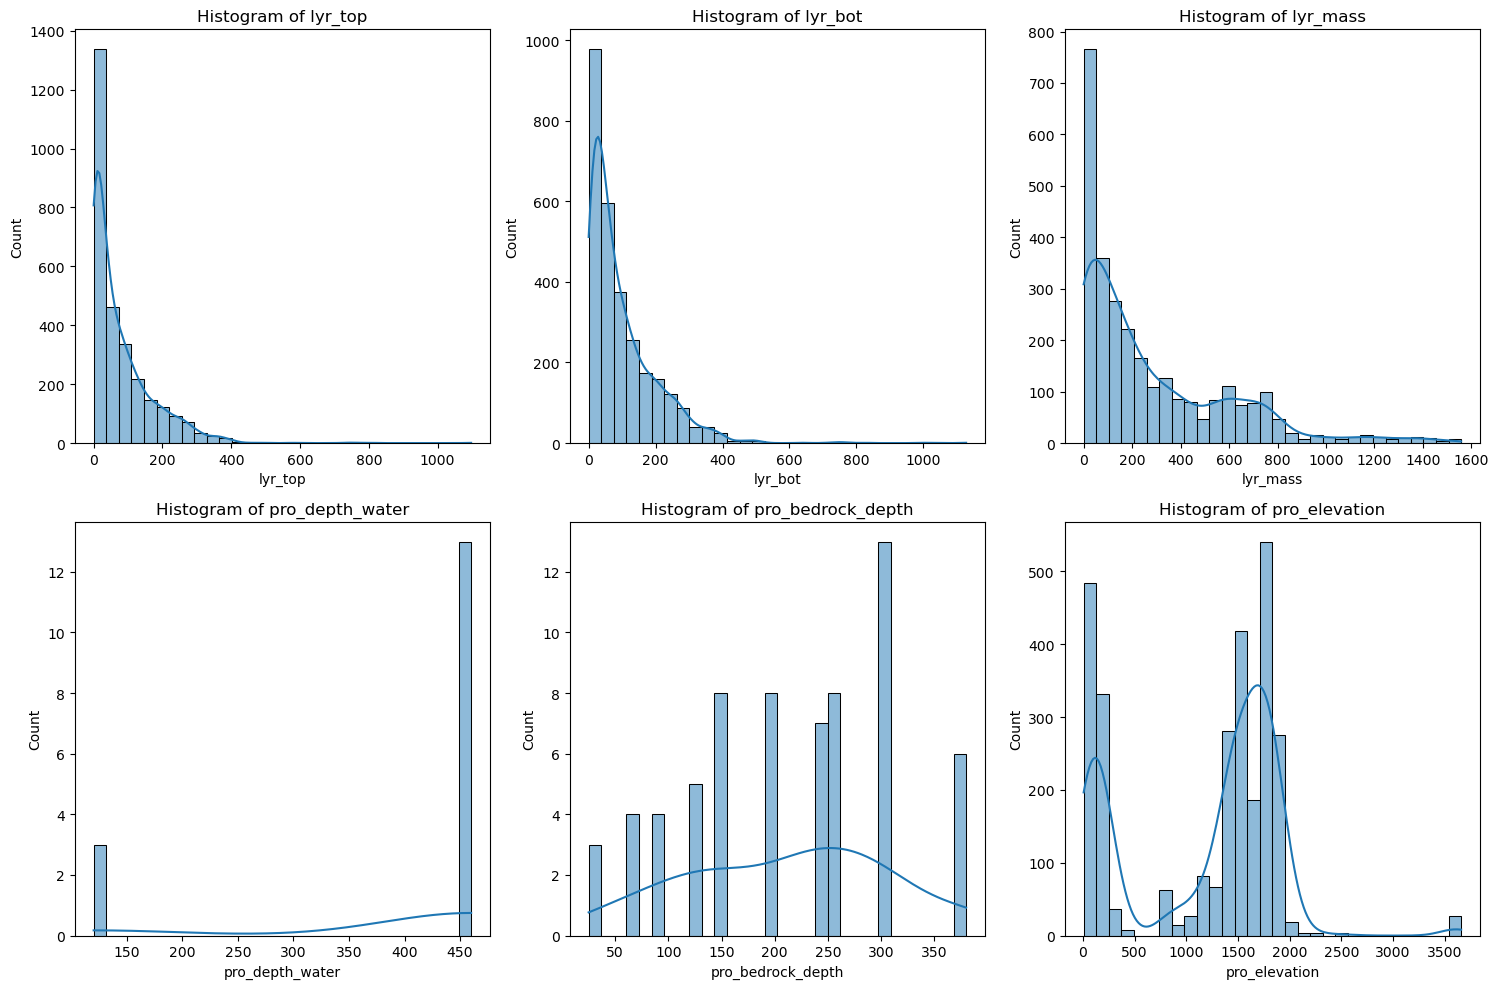


Descriptive Statistics:
           lyr_top      lyr_bot     lyr_mass  pro_depth_water  \
count  2872.000000  2872.000000  2872.000000        16.000000   
mean     76.545836    98.799373   281.815418       396.250000   
std      90.561476   101.959891   311.048170       137.058382   
min       0.000000     0.000000     0.000000       120.000000   
25%      10.000000    27.000000    41.110000       460.000000   
50%      43.500000    65.000000   164.100000       460.000000   
75%     112.000000   142.000000   439.692500       460.000000   
max    1097.280000  1127.760000  1557.740000       460.000000   

       pro_bedrock_depth  pro_elevation  
count          66.000000    2872.000000  
mean          211.893939    1169.145158  
std            96.303867     744.162371  
min            25.000000       6.000000  
25%           145.000000     210.000000  
50%           240.000000    1497.000000  
75%           300.000000    1723.000000  
max           380.000000    3657.600000  

Outliers i

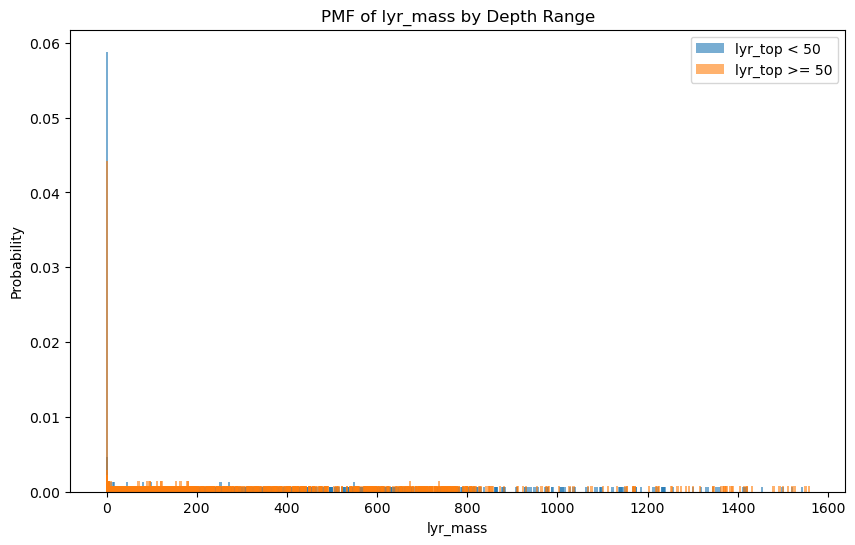

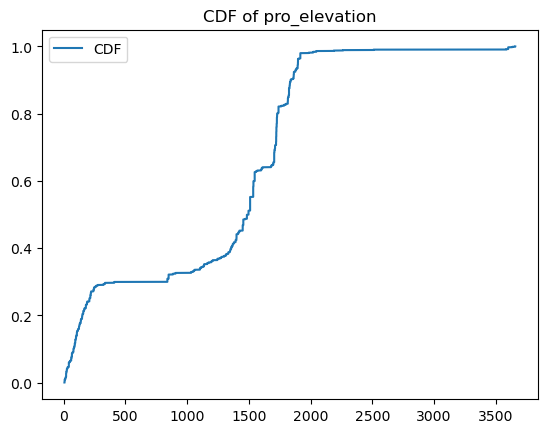

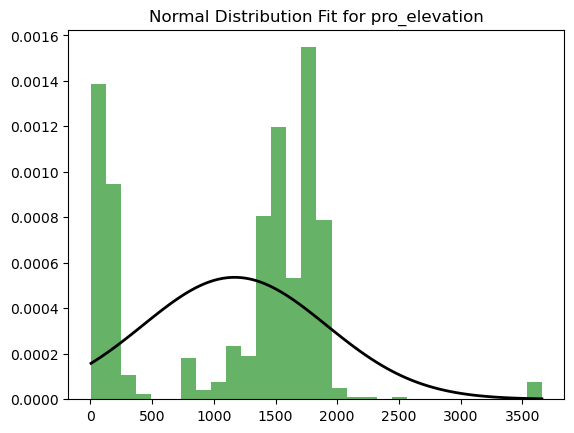

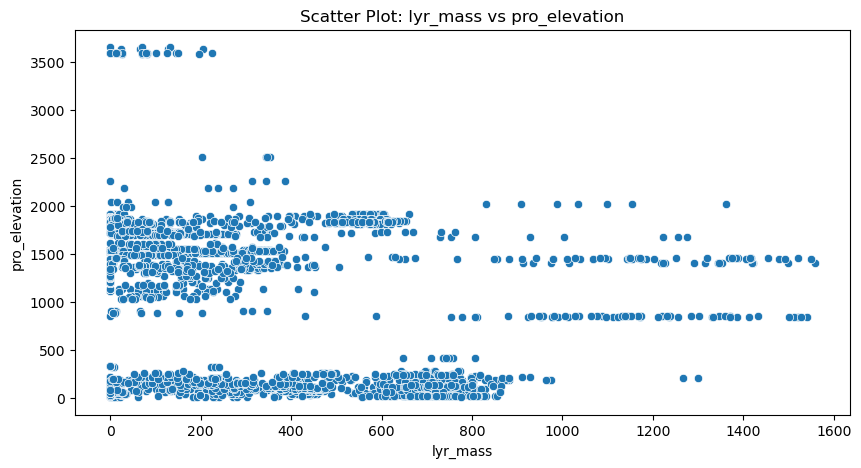

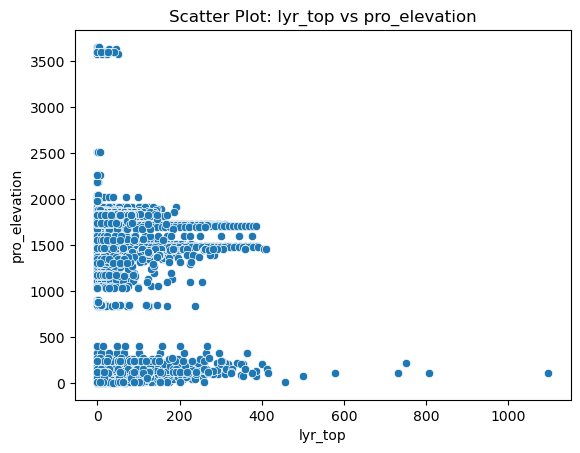


Correlation Matrix:
               lyr_mass   lyr_top  pro_elevation
lyr_mass       1.000000  0.022273      -0.326385
lyr_top        0.022273  1.000000      -0.038826
pro_elevation -0.326385 -0.038826       1.000000

T-Test Results: t-stat = -18.922906360226246, p-value = 2.3735944159485157e-75

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:          pro_elevation   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     139.2
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           3.53e-84
Time:                        16:16:25   Log-Likelihood:                -22870.
No. Observations:                2872   AIC:                         4.575e+04
Df Residuals:                    2868   BIC:                         4.577e+04
Df Model:                           3             

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm

# Load Dataset
df = pd.read_csv("USGS_SoilSampleArchive_Data.csv")

# Define key variables
variables = ["lyr_top", "lyr_bot", "lyr_mass", "pro_depth_water", "pro_bedrock_depth", "pro_elevation"]

# Chapter 1: Describe Variables
variable_descriptions = {
    "lyr_top": "Depth at the top of the soil layer (cm).",
    "lyr_bot": "Depth at the bottom of the soil layer (cm).",
    "lyr_mass": "Mass of the soil layer sample (g).",
    "pro_depth_water": "Depth to the water table (cm).",
    "pro_bedrock_depth": "Depth to bedrock (cm).",
    "pro_elevation": "Elevation of the soil sample location (m)."
}
print("\nVariable Descriptions:")
for var, desc in variable_descriptions.items():
    print(f"{var}: {desc}")

# Chapter 2: Histograms & Outlier Analysis
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var].dropna(), bins=30, kde=True)
    plt.title(f"Histogram of {var}")
plt.tight_layout()
plt.show()

# Descriptive Statistics
stats_df = df[variables].describe()
print("\nDescriptive Statistics:")
print(stats_df)

# Identifying Outliers using IQR
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR))]
    print(f"\nOutliers in {var}: {len(outliers)} occurrences")

# Chapter 3: PMF Comparison (Improved Visualization)
def pmf(data):
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / sum(counts)
    return values, probabilities

subset1 = df[df['lyr_top'] < 50]['lyr_mass'].dropna()
subset2 = df[df['lyr_top'] >= 50]['lyr_mass'].dropna()
values1, pmf1 = pmf(subset1)
values2, pmf2 = pmf(subset2)

plt.figure(figsize=(10, 6))
plt.bar(values1, pmf1, width=5, alpha=0.6, label='lyr_top < 50')
plt.bar(values2, pmf2, width=5, alpha=0.6, label='lyr_top >= 50')
plt.xlabel("lyr_mass")
plt.ylabel("Probability")
plt.title("PMF of lyr_mass by Depth Range")
plt.legend()
plt.show()


# Chapter 4: CDF Plot (Example: pro_elevation)
ecdf = ECDF(df['pro_elevation'].dropna())
plt.plot(ecdf.x, ecdf.y, label='CDF')
plt.title('CDF of pro_elevation')
plt.legend()
plt.show()

# Chapter 5: Analytical Distribution (Normal Distribution Fit)
mu, sigma = stats.norm.fit(df['pro_elevation'].dropna())
x = np.linspace(df['pro_elevation'].min(), df['pro_elevation'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.hist(df['pro_elevation'].dropna(), bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, 'k', linewidth=2)
plt.title('Normal Distribution Fit for pro_elevation')
plt.show()

# Chapter 7: Scatter Plots & Correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['lyr_mass'], y=df['pro_elevation'])
plt.title("Scatter Plot: lyr_mass vs pro_elevation")
plt.show()

sns.scatterplot(x=df['lyr_top'], y=df['pro_elevation'])
plt.title("Scatter Plot: lyr_top vs pro_elevation")
plt.show()

# Pearson Correlation
correlation_matrix = df[['lyr_mass', 'lyr_top', 'pro_elevation']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Chapter 9: Hypothesis Testing (T-test between high and low elevation samples)
high_elevation = df[df['pro_elevation'] > df['pro_elevation'].median()]['lyr_mass'].dropna()
low_elevation = df[df['pro_elevation'] <= df['pro_elevation'].median()]['lyr_mass'].dropna()
t_stat, p_value = stats.ttest_ind(high_elevation, low_elevation)
print(f"\nT-Test Results: t-stat = {t_stat}, p-value = {p_value}")

# Chapter 10 & 11: Regression Analysis (pro_elevation as Dependent Variable)
X = df[['lyr_top', 'lyr_bot', 'lyr_mass']].dropna()
y = df.loc[X.index, 'pro_elevation']
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()
print("\nRegression Summary:")
print(model.summary())
